In [1]:
import pandas as pd
import numpy as np

from plotnine import *
from plotnine.data import *


## Create fake fingerprint data for three pockets

In [37]:
## create fake data in the fingerprint format

residues=['ALA1','GLY2','CYS3']
bits=['bit1','bit2','bit3','bit4','bit5']
names = ["%s_%s"%(res,bit) for res in residues for bit in bits]
index = pd.MultiIndex.from_tuples([(res,bit) for res in residues for bit in bits], 
                                  names=['residue', 'bit'])

def gen_fake_sif(n_frames, prob):
    df = pd.DataFrame( 
    1.*(np.random.uniform(
        size=len(bits)*len(residues)*n_frames)>prob).reshape(
        n_frames,len(bits)*len(residues)), columns=index)
    return df

In [38]:
# generate fake fingerprints for three-different pockets
df1 = gen_fake_sif(5,.3)
df2 = gen_fake_sif(10,.5)
df3 = gen_fake_sif(7,.6)

df1.head()

residue ALA1                     GLY2                     CYS3                 \
bit     bit1 bit2 bit3 bit4 bit5 bit1 bit2 bit3 bit4 bit5 bit1 bit2 bit3 bit4   
0        1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
1        1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0   
2        1.0  1.0  0.0  1.0  1.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0   
3        1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0   
4        1.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0   

residue       
bit     bit5  
0        1.0  
1        1.0  
2        0.0  
3        1.0  
4        0.0

## Prepare the data in a single dataframe and melt it

In [15]:
## we prepare the data for plotting by concatenting and melting the dataframe
## for ggplot the data has to be melted so that we have pocket, residue, and bit columns
dconcat = pd.concat([df1,df2,df3], axis=1, keys=['pk1','pk2','pk3'],names=['pocket'])
data = pd.melt(dconcat).dropna()
data.head()


,pocket,residue,bit,value
0,pk1,ALA1,bit1,1.0
1,pk1,ALA1,bit1,1.0
2,pk1,ALA1,bit1,1.0
3,pk1,ALA1,bit1,1.0
4,pk1,ALA1,bit1,1.0


## Do the plots
Once the data is in the melted format, it's straightforward to plot it in different ways

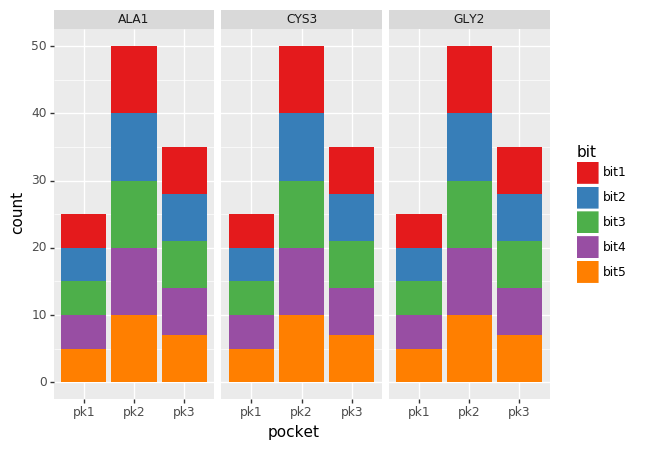

<ggplot: (8726568383324)>

In [39]:
ggplot(data, aes(x='pocket')) + geom_bar(aes(fill='bit')) + \
  facet_wrap('residue') + \
  scale_fill_brewer(type='qual',palette='Set1')

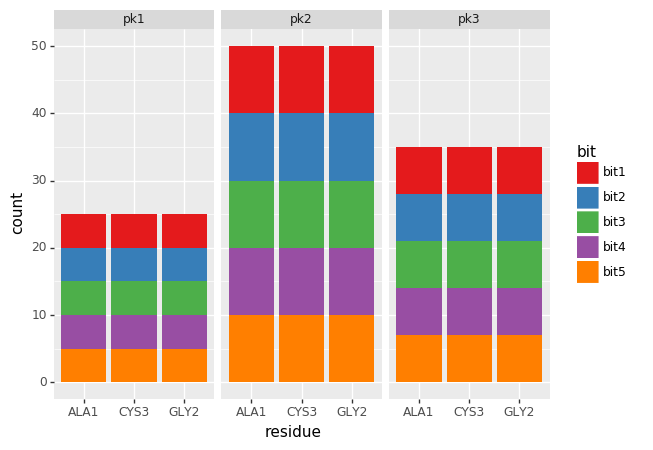

<ggplot: (8726567494604)>

In [40]:
ggplot(data, aes(x='residue')) + geom_bar(aes(fill='bit')) + \
 facet_wrap('pocket') + \
scale_fill_brewer(type='qual',palette='Set1')